### Imports and Constants

In [36]:
import numpy as np
import matplotlib.pyplot as plt
import math
%matplotlib inline
PULSE_WIDTH = 10
no_of_samples = 10

### Constant Functions

##### Signal Generation Function

In [37]:
def generateRectSignal(start, N,value):
   x = np.linspace(start, start+1)
   y=np.ones(N)*value/math.sqrt(N)
   return x, y
def signal_sampling( signal, n=10):
   samples = np.zeros(n)
   for i in range(len(samples)):
      samples[i] = signal[PULSE_WIDTH-1+i*PULSE_WIDTH]
   return samples


##### Plotting Functions

In [38]:

def plot_signal(data_len,signal_to_plot,title,color='b'):
    plt.grid(True)
    x = np.linspace(0, data_len, len(signal_to_plot))
    plt.xlabel('Time')
    plt.ylabel('Amplitude')
    plt.title(title)
    plt.plot(x,signal_to_plot,color)
def plot_2_signals(data_len,signal1,signal2,title1,title2,color1='b',color2='r'):
    x = np.linspace(0, data_len, len(signal1))
    plt.figure(figsize=(15,5))
    plt.subplot(1,2,1)
    plt.title(title1)
    plt.xlabel('Time')
    plt.ylabel('Amplitude')
    plt.grid(True)
    plt.plot(x, signal1,color1)
    plt.subplot(1,2,2)
    plt.title(title2)
    plt.xlabel('Time')
    plt.ylabel('Amplitude')
    plt.grid(True)
    plt.plot(x, signal2,color2)
    plt.show()
def plot_3_signals(data_len,signal1,signal2,signal3,title1,title2,title3):
    x = np.linspace(0,int(np.rint(len(signal1)/PULSE_WIDTH)) , len(signal1))
    plt.figure(figsize=(10,15))
    plt.subplot(3,1,1)
    plt.title(title1)
    plt.xlabel('Time')
    plt.ylabel('Amplitude')
    plt.grid(True)
    indecies = np.arange(start=PULSE_WIDTH-1,stop= (data_len+1)*PULSE_WIDTH-2,step=PULSE_WIDTH)
    print(indecies)
    plt.plot(x, signal1,'-ko',markevery=indecies,label='line with select markers')
    plt.subplot(3,1,2)
    plt.title(title2)
    plt.xlabel('Time')
    plt.ylabel('Amplitude')
    plt.grid(True)
    plt.plot(x, signal2,'-rD',markevery=indecies,label='line with select markers')
    plt.subplot(3,1,3)
    plt.title(title3)
    plt.xlabel('Time')
    plt.ylabel('Amplitude')
    plt.grid(True)
    plt.plot(x, signal3,'-bx',markevery=indecies,label='line with select markers')
    plt.show()

### Random Bit pattern Generation

In [39]:
data =np.array( [1,1,1,0,0,0,1,0,1,1])
signal = []
for i in range(len(data)):
    if data[i] == 0:
        y = generateRectSignal(i, PULSE_WIDTH, -1)
    else:
        y = generateRectSignal(i, PULSE_WIDTH, 1)
    signal = np.concatenate((signal, y[1]))

### Adding AWGN to signal

#### Noise

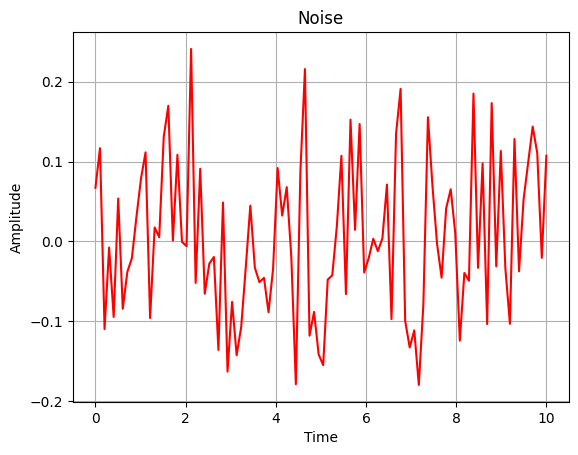

In [40]:
noise_std =0.1
noise = np.random.normal(0, noise_std, len(signal))
plot_signal(len(data),noise,'Noise','r')

#### Adding noise to signal

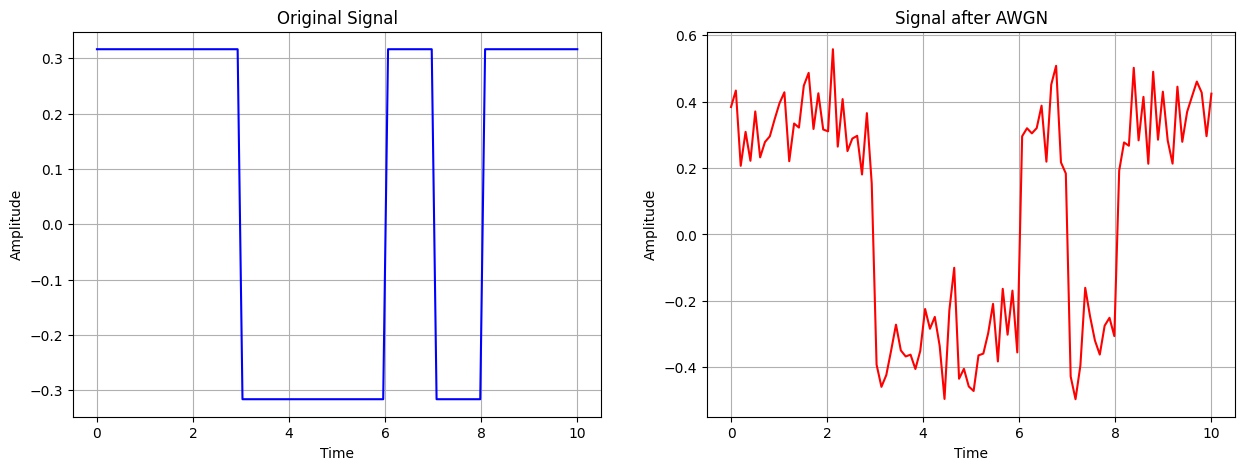

In [41]:

signal_after_awgn = signal+noise
plot_2_signals(len(data),signal,signal_after_awgn,'Original Signal','Signal after AWGN','b','r')

## Reciever Internal Filters

### Matched Filter 
##### Assuming k = 1 

In [42]:
matched_filter = generateRectSignal(0, PULSE_WIDTH, 1)[1]
matched_filter_output = np.convolve(signal_after_awgn, matched_filter,'full')

### Given Filter

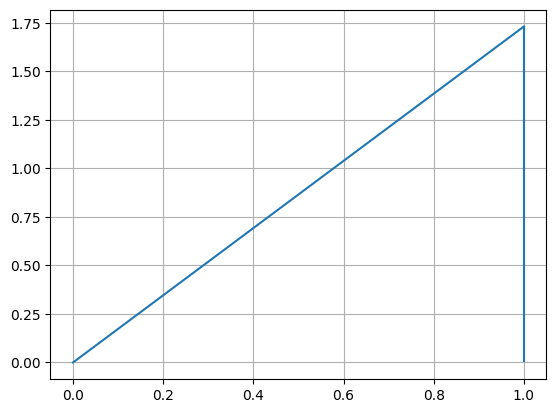

In [43]:
x= np.linspace(0, 1, PULSE_WIDTH)
given_response=(3**0.5)*x
plt.grid(True)
plt.vlines(1,ymin=0,ymax=3**0.5)
plt.plot(x,given_response)
given_response_output = np.convolve(signal_after_awgn, given_response,'full')

#### No Filter (Delta)

In [44]:
delta = np.zeros(PULSE_WIDTH)
delta[0] = 1
no_filter_output = np.convolve(signal_after_awgn, delta,'full')

### All Filters Output

[ 9 19 29 39 49 59 69 79 89 99]


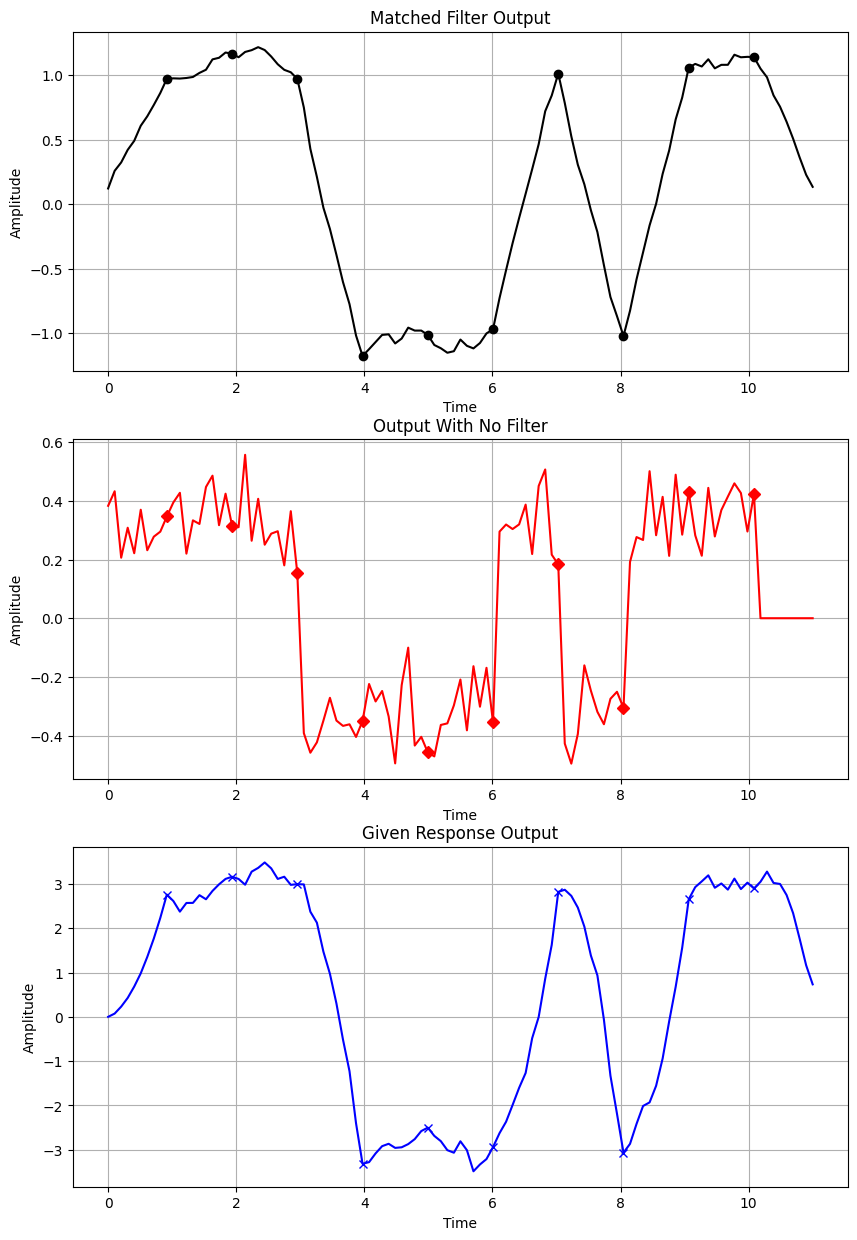

In [45]:

plot_3_signals(len(data),matched_filter_output,no_filter_output,given_response_output,'Matched Filter Output','Output With No Filter','Given Response Output')

## Outputs and Practical BER

#### Getting Output Bits from each Filter

In [46]:
matched_filter_bits = signal_sampling(matched_filter_output,no_of_samples)
given_response_bits = signal_sampling(given_response_output,no_of_samples)
no_filter_bits = signal_sampling(no_filter_output,no_of_samples)
matched_filter_bits = np.where(matched_filter_bits>0,1,0)
given_response_bits = np.where(given_response_bits>0,1,0)
no_filter_bits = np.where(no_filter_bits>0,1,0)
print('Sent Data :            ',data)
print('Matched Filter Output: ', matched_filter_bits)
print('Given Response Output: ', given_response_bits)
print('No Filter Output:      ', no_filter_bits)


Sent Data :             [1 1 1 0 0 0 1 0 1 1]
Matched Filter Output:  [1 1 1 0 0 0 1 0 1 1]
Given Response Output:  [1 1 1 0 0 0 1 0 1 1]
No Filter Output:       [1 1 1 0 0 0 1 0 1 1]


#### Getting BER for each filter

In [47]:
BER_matched_filter = np.sum(np.abs(np.array(data)-np.array(matched_filter_bits)))/len(data)
BER_given_response = np.sum(np.abs(np.array(data)-np.array(given_response_bits)))/len(data)
BER_no_filter = np.sum(np.abs(np.array(data)-np.array(no_filter_bits)))/len(data)
print('BER Matched Filter:',BER_matched_filter)
print('BER Given Response:',BER_given_response)
print('BER No Filter:',BER_no_filter)

BER Matched Filter: 0.0
BER Given Response: 0.0
BER No Filter: 0.0


## BER Plotting

#### Initializing N0
##### Note : Energy is constant = A^2 * T = 1 

In [32]:
energy = 1
N0 = np.linspace(-10, 20,20-(-10)+1)
print('N0:',N0)
N0 = 10**(N0/10)
N0=energy/N0
noise_std_list = (N0/2)**0.5
print('Noise Standard Deviation:',noise_std_list)

N0: [-10.  -9.  -8.  -7.  -6.  -5.  -4.  -3.  -2.  -1.   0.   1.   2.   3.
   4.   5.   6.   7.   8.   9.  10.  11.  12.  13.  14.  15.  16.  17.
  18.  19.  20.]
Noise Standard Deviation: [2.23606798 1.99289768 1.77617193 1.5830149  1.41086351 1.25743343
 1.12068872 0.99881488 0.8901947  0.79338686 0.70710678 0.63020958
 0.56167488 0.50059326 0.44615422 0.39763536 0.35439289 0.315853
 0.28150428 0.25089095 0.2236068  0.19928977 0.17761719 0.15830149
 0.14108635 0.12574334 0.11206887 0.09988149 0.08901947 0.07933869
 0.07071068]


In [34]:
practical_BER_matched_filter_list = []
theortical_BER_matched_filter_list = []
practical_BER_given_response_list = []
theortical_BER_given_response_list = []
practical_BER_no_filter_list = []
theortical_BER_no_filter_list = []
BER_matched_filter=0
BER_given_response=0
BER_no_filter=0
data = np.random.randint(0,2,100000)
signal =np.array([])
print('Data Generation : Started')
for i in range(len(data)):
    print('Generating pulse #'+str(i))
    if data[i] == 0:
            x,y = generateRectSignal(i, PULSE_WIDTH, -1)
    else:
            x,y = generateRectSignal(i, PULSE_WIDTH, 1)
    signal = np.concatenate((signal, y))
print('Data Generation : Finished')
for sigma in noise_std_list:
    noise = np.random.normal(0, sigma, len(signal))
    currN0 = sigma**2
    currN0 = 2*currN0
    signal_after_awgn = signal+noise
    matched_filter_output = np.convolve(signal_after_awgn, matched_filter,'full')
    no_filter_output = np.convolve(signal_after_awgn, delta,'full')
    given_response_output = np.convolve(signal_after_awgn, given_response,'full')
    samples = signal_sampling(matched_filter_output,len(data))
    samples=np.where(samples>0,1,0)
    practical_BER_matched_filter_list.append(np.sum(np.abs(np.array(data)-np.array(samples)))/len(data))
    theortical_BER = 0.5*math.erfc(1/(currN0**0.5))
    theortical_BER_matched_filter_list.append(theortical_BER)
    samples = signal_sampling(given_response_output,len(data))
    samples=np.where(samples>0,1,0)
    practical_BER_given_response_list.append(np.sum(np.abs(np.array(data)-np.array(samples)))/len(data))
    theortical_BER = 0.5*math.erfc(3**0.5/(2*currN0**0.5))
    theortical_BER_given_response_list.append(theortical_BER)
    samples = signal_sampling(no_filter_output,len(data))
    samples=np.where(samples>0,1,0)
    practical_BER_no_filter_list.append(np.sum(np.abs(np.array(data)-np.array(samples)))/len(data))
    theortical_BER = 0.5*math.erfc(1*1/((currN0*PULSE_WIDTH)**0.5))
    theortical_BER_no_filter_list.append(theortical_BER)
    BER_matched_filter=0
    BER_given_response=0
    BER_no_filter=0


Data Generation : Started
Generating pulse #0
Generating pulse #1
Generating pulse #2
Generating pulse #3
Generating pulse #4
Generating pulse #5
Generating pulse #6
Generating pulse #7
Generating pulse #8
Generating pulse #9
Generating pulse #10
Generating pulse #11
Generating pulse #12
Generating pulse #13
Generating pulse #14
Generating pulse #15
Generating pulse #16
Generating pulse #17
Generating pulse #18
Generating pulse #19
Generating pulse #20
Generating pulse #21
Generating pulse #22
Generating pulse #23
Generating pulse #24
Generating pulse #25
Generating pulse #26
Generating pulse #27
Generating pulse #28
Generating pulse #29
Generating pulse #30
Generating pulse #31
Generating pulse #32
Generating pulse #33
Generating pulse #34
Generating pulse #35
Generating pulse #36
Generating pulse #37
Generating pulse #38
Generating pulse #39
Generating pulse #40
Generating pulse #41
Generating pulse #42
Generating pulse #43
Generating pulse #44
Generating pulse #45
Generating pulse #

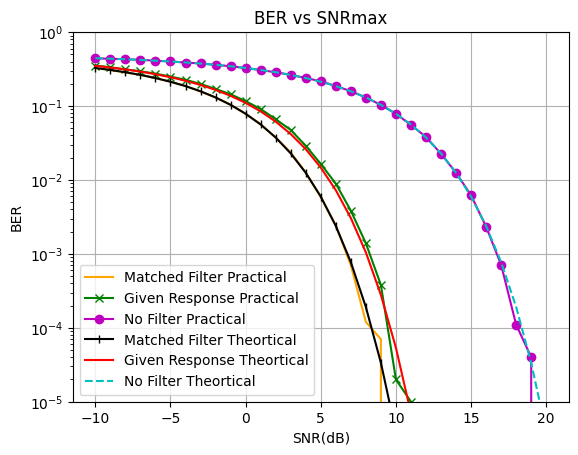

In [35]:
N0 = np.linspace(-10, 20,20-(-10)+1)

plt.semilogy(N0,practical_BER_matched_filter_list,'orange')
plt.semilogy(N0,practical_BER_given_response_list,'gx-')
plt.semilogy(N0,practical_BER_no_filter_list,'mo-')
plt.semilogy(N0,theortical_BER_matched_filter_list,'k|-')
plt.semilogy(N0,theortical_BER_given_response_list,'red')
plt.semilogy(N0,theortical_BER_no_filter_list,'c--')
plt.xlabel('SNR(dB)')
plt.ylabel('BER')
plt.ylim(10**-5,1)
plt.title('BER vs SNRmax')
plt.legend(['Matched Filter Practical','Given Response Practical','No Filter Practical','Matched Filter Theortical','Given Response Theortical','No Filter Theortical'])
plt.grid(True)
plt.show()